In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from rapidfuzz import process, fuzz
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import custom_pipes

import pickle

In [2]:
data = pd.read_csv(f'data/train.csv')

In [3]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

Dropping ID variable as it holds no statistical power

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=123)

In [5]:
pickle.dump(train, open('data/train.pkl', 'wb'))
pickle.dump(test, open('data/test.pkl', 'wb'))

In [6]:
train = pickle.load(open('data/train.pkl', 'rb'))
test = pickle.load(open('data/test.pkl', 'rb'))

In [7]:
train

,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
8162,33.0600,0.7600,2.2000,8.2100,3.0100,0.7800,0.8100,307.8500,358.1100,10.0000,9.0000,4.0000,2.4100,26.0000,Superheated,42.5000,-42.0000,96.7000,26.0000,5.0000,12.3000,9.3500,0.8000,0.2748
6136,29.0000,0.2100,1.8100,5.6100,2.0200,0.2200,1.5900,525.0500,364.0500,14.0000,13.0000,5.0000,0.4000,10.0000,Subcooled,37.9000,-1.0000,152.0000,25.0000,5.0000,15.1000,8.9500,-0.8000,0.2682
4800,9.0700,0.6300,2.2200,9.8100,1.0100,1.1900,0.4000,369.8200,333.9800,15.0000,10.0000,5.0000,2.6000,26.0000,Subcooled,37.9000,-1.0000,152.0000,12.0000,2.0000,16.0500,2.6000,3.4000,0.2728
1885,21.2000,0.2100,1.8100,3.1800,0.8100,1.4000,0.6200,496.3500,354.7800,7.0000,3.0000,9.0000,1.7900,2.0000,Subcooled,37.9000,-1.0000,152.0000,13.0000,2.0000,7.8500,0.2000,-1.5000,0.9822
7579,39.0500,0.7200,2.0000,4.0100,2.7800,1.4100,0.7900,446.7700,357.8700,18.0000,4.0000,3.0000,2.6000,23.0000,Subcooled,42.5000,-42.0000,96.7000,10.0000,2.0000,18.9500,5.8000,-1.6000,0.3918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,29.6300,0.1900,2.1800,3.9900,2.0200,1.5900,1.5900,380.0500,408.7000,16.0000,8.0000,6.0000,2.3900,6.0000,Subcooled,37.9000,-1.0000,152.0000,2.0000,1.0000,19.5500,-2.2000,0.6000,0.1746
7763,27.8700,0.6500,2.4000,3.1900,1.9900,1.0200,0.6000,349.5900,333.3900,12.0000,6.0000,12.0000,2.5800,16.0000,Subcooled,42.5000,-42.0000,96.7000,5.0000,1.0000,15.8500,3.4000,4.7000,0.0665
5218,17.4400,0.5700,0.6000,5.8100,0.7900,1.3800,0.3900,309.6300,341.9300,6.0000,7.0000,5.0000,0.5900,17.0000,Superheated,42.5000,-42.0000,96.7000,25.0000,5.0000,7.3000,5.3500,-0.9000,0.2205
1346,18.2100,0.5700,1.9900,7.1900,1.0200,0.1900,0.3800,541.0100,318.6800,14.0000,12.0000,15.0000,2.1900,3.0000,Subcooled,37.9000,-1.0000,152.0000,14.0000,2.0000,14.9500,0.8000,7.1000,0.4519


In [8]:
train.head()

,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
8162,33.0600,0.7600,2.2000,8.2100,3.0100,0.7800,0.8100,307.8500,358.1100,10.0000,9.0000,4.0000,2.4100,26.0000,Superheated,42.5000,-42.0000,96.7000,26.0000,5.0000,12.3000,9.3500,0.8000,0.2748
6136,29.0000,0.2100,1.8100,5.6100,2.0200,0.2200,1.5900,525.0500,364.0500,14.0000,13.0000,5.0000,0.4000,10.0000,Subcooled,37.9000,-1.0000,152.0000,25.0000,5.0000,15.1000,8.9500,-0.8000,0.2682
4800,9.0700,0.6300,2.2200,9.8100,1.0100,1.1900,0.4000,369.8200,333.9800,15.0000,10.0000,5.0000,2.6000,26.0000,Subcooled,37.9000,-1.0000,152.0000,12.0000,2.0000,16.0500,2.6000,3.4000,0.2728
1885,21.2000,0.2100,1.8100,3.1800,0.8100,1.4000,0.6200,496.3500,354.7800,7.0000,3.0000,9.0000,1.7900,2.0000,Subcooled,37.9000,-1.0000,152.0000,13.0000,2.0000,7.8500,0.2000,-1.5000,0.9822
7579,39.0500,0.7200,2.0000,4.0100,2.7800,1.4100,0.7900,446.7700,357.8700,18.0000,4.0000,3.0000,2.6000,23.0000,Subcooled,42.5000,-42.0000,96.7000,10.0000,2.0000,18.9500,5.8000,-1.6000,0.3918


In [9]:
train.columns

Index(['Tank Failure Pressure (bar)', 'Liquid Ratio', 'Tank Width (m)',
       'Tank Length (m)', 'Tank Height (m)', 'BLEVE Height (m)',
       'Vapour Height (m)', 'Vapour Temperature (K)', 'Liquid Temperature (K)',
       'Obstacle Distance to BLEVE (m)', 'Obstacle Width (m)',
       'Obstacle Height (m)', 'Obstacle Thickness (m)', 'Obstacle Angle',
       'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'Target Pressure (bar)'],
      dtype='object')

In [10]:
mapping = {
                'Tank Failure Pressure (bar)': 'tfp',
                'Liquid Ratio': 'lr',
                'Tank Width (m)': 'width_tank',
                'Tank Length (m)': 'length_tank',
                'Tank Height (m)': 'height_tank',
                'BLEVE Height (m)': 'height_bleve',
                'Vapour Height (m)': 'height_vapour', 
                'Vapour Temperature (K)': 'temp_vapour', 
                'Liquid Temperature (K)': 'temp_liquid',
                'Obstacle Distance to BLEVE (m)': 'distance',
                'Obstacle Width (m)': 'width_obstacle',
                'Obstacle Height (m)': 'height_obstacle',
                'Obstacle Thickness (m)': 'thickness_obstacle',
                'Obstacle Angle': 'angle_obstacle',
                'Status': 'status',
                'Liquid Critical Pressure (bar)': 'crit_pressure_liquid',
                'Liquid Boiling Temperature (K)': 'boil_temp_liquid',
                'Liquid Critical Temperature (K)': 'crit_temp_liquid',
                'Sensor ID': 'id_sensor',
                'Sensor Position Side': 'side_sensor', 
                'Sensor Position x': 'x_sensor',
                'Sensor Position y': 'y_sensor', 
                'Sensor Position z': 'z_sensor', 
                'Target Pressure (bar)': 'pressure'
}

train.rename(columns=mapping,inplace=True)
test.rename(columns=mapping,inplace=True)

In [11]:
train.shape

(8040, 24)

In [12]:
train.describe()

,tfp,lr,width_tank,length_tank,height_tank,height_bleve,height_vapour,temp_vapour,temp_liquid,distance,width_obstacle,height_obstacle,thickness_obstacle,angle_obstacle,crit_pressure_liquid,boil_temp_liquid,crit_temp_liquid,id_sensor,side_sensor,x_sensor,y_sensor,z_sensor,pressure
count,8034.0000,8034.0000,8035.0000,8037.0000,8035.0000,8034.0000,8034.0000,8022.0000,8018.0000,8035.0000,8034.0000,8036.0000,8036.0000,8036.0000,8020.0000,8025.0000,8021.0000,8036.0000,8034.0000,8035.0000,8035.0000,8036.0000,8036.0000
mean,38.3791,0.4946,1.7250,5.5517,1.6463,1.0293,0.8585,398.9733,343.7994,11.2049,8.6476,8.1905,1.6870,14.0623,40.0165,-19.8728,126.5252,13.9568,2.3276,12.9193,2.9336,3.0787,0.3612
std,233.9837,0.2273,0.7643,2.6212,0.7287,0.5721,0.5382,71.7193,36.5320,4.0376,3.9542,3.7791,0.7465,9.2455,2.2928,20.4366,27.5660,7.8159,1.3382,4.1794,4.6425,4.2578,0.5036
min,4.8900,0.1000,0.3800,0.5800,0.3800,-0.0200,0.1800,282.1300,282.5400,5.0000,3.0000,3.0000,0.3800,0.0000,37.9000,-42.0000,96.7000,1.0000,1.0000,5.1500,-9.0500,-2.9000,0.0161
25%,13.1000,0.2800,1.0100,3.3800,1.0100,0.5900,0.4100,341.6625,312.7675,8.0000,5.0000,5.0000,1.0000,6.0000,37.9000,-42.0000,96.7000,7.0000,1.0000,9.2500,-0.1000,-0.6000,0.1027
50%,21.2200,0.5100,1.7900,5.5900,1.6000,1.0200,0.7800,389.2250,342.7350,11.0000,9.0000,8.0000,1.6200,14.0000,37.9000,-1.0000,152.0000,14.0000,2.0000,12.6500,2.7000,2.3000,0.2023
75%,32.8000,0.6800,2.4000,7.8200,2.2100,1.5900,1.2100,445.0500,368.0375,14.0000,12.0000,11.0000,2.3900,21.0000,42.5000,-1.0000,152.0000,21.0000,3.0000,16.2000,6.2000,5.4000,0.4128
max,4882.5736,0.9000,3.0200,10.0200,3.0200,2.0200,2.6200,573.8800,425.1200,20.0000,18.0000,18.0000,3.0200,30.0000,42.5000,-1.0000,152.0000,27.0000,5.0000,23.7500,19.5500,16.0000,9.1705


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 8162 to 3582
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tfp                   8034 non-null   float64
 1   lr                    8034 non-null   float64
 2   width_tank            8035 non-null   float64
 3   length_tank           8037 non-null   float64
 4   height_tank           8035 non-null   float64
 5   height_bleve          8034 non-null   float64
 6   height_vapour         8034 non-null   float64
 7   temp_vapour           8022 non-null   float64
 8   temp_liquid           8018 non-null   float64
 9   distance              8035 non-null   float64
 10  width_obstacle        8034 non-null   float64
 11  height_obstacle       8036 non-null   float64
 12  thickness_obstacle    8036 non-null   float64
 13  angle_obstacle        8036 non-null   float64
 14  status                8035 non-null   object 
 15  crit_pressure_liquid  8

# Analysis

<Axes: >

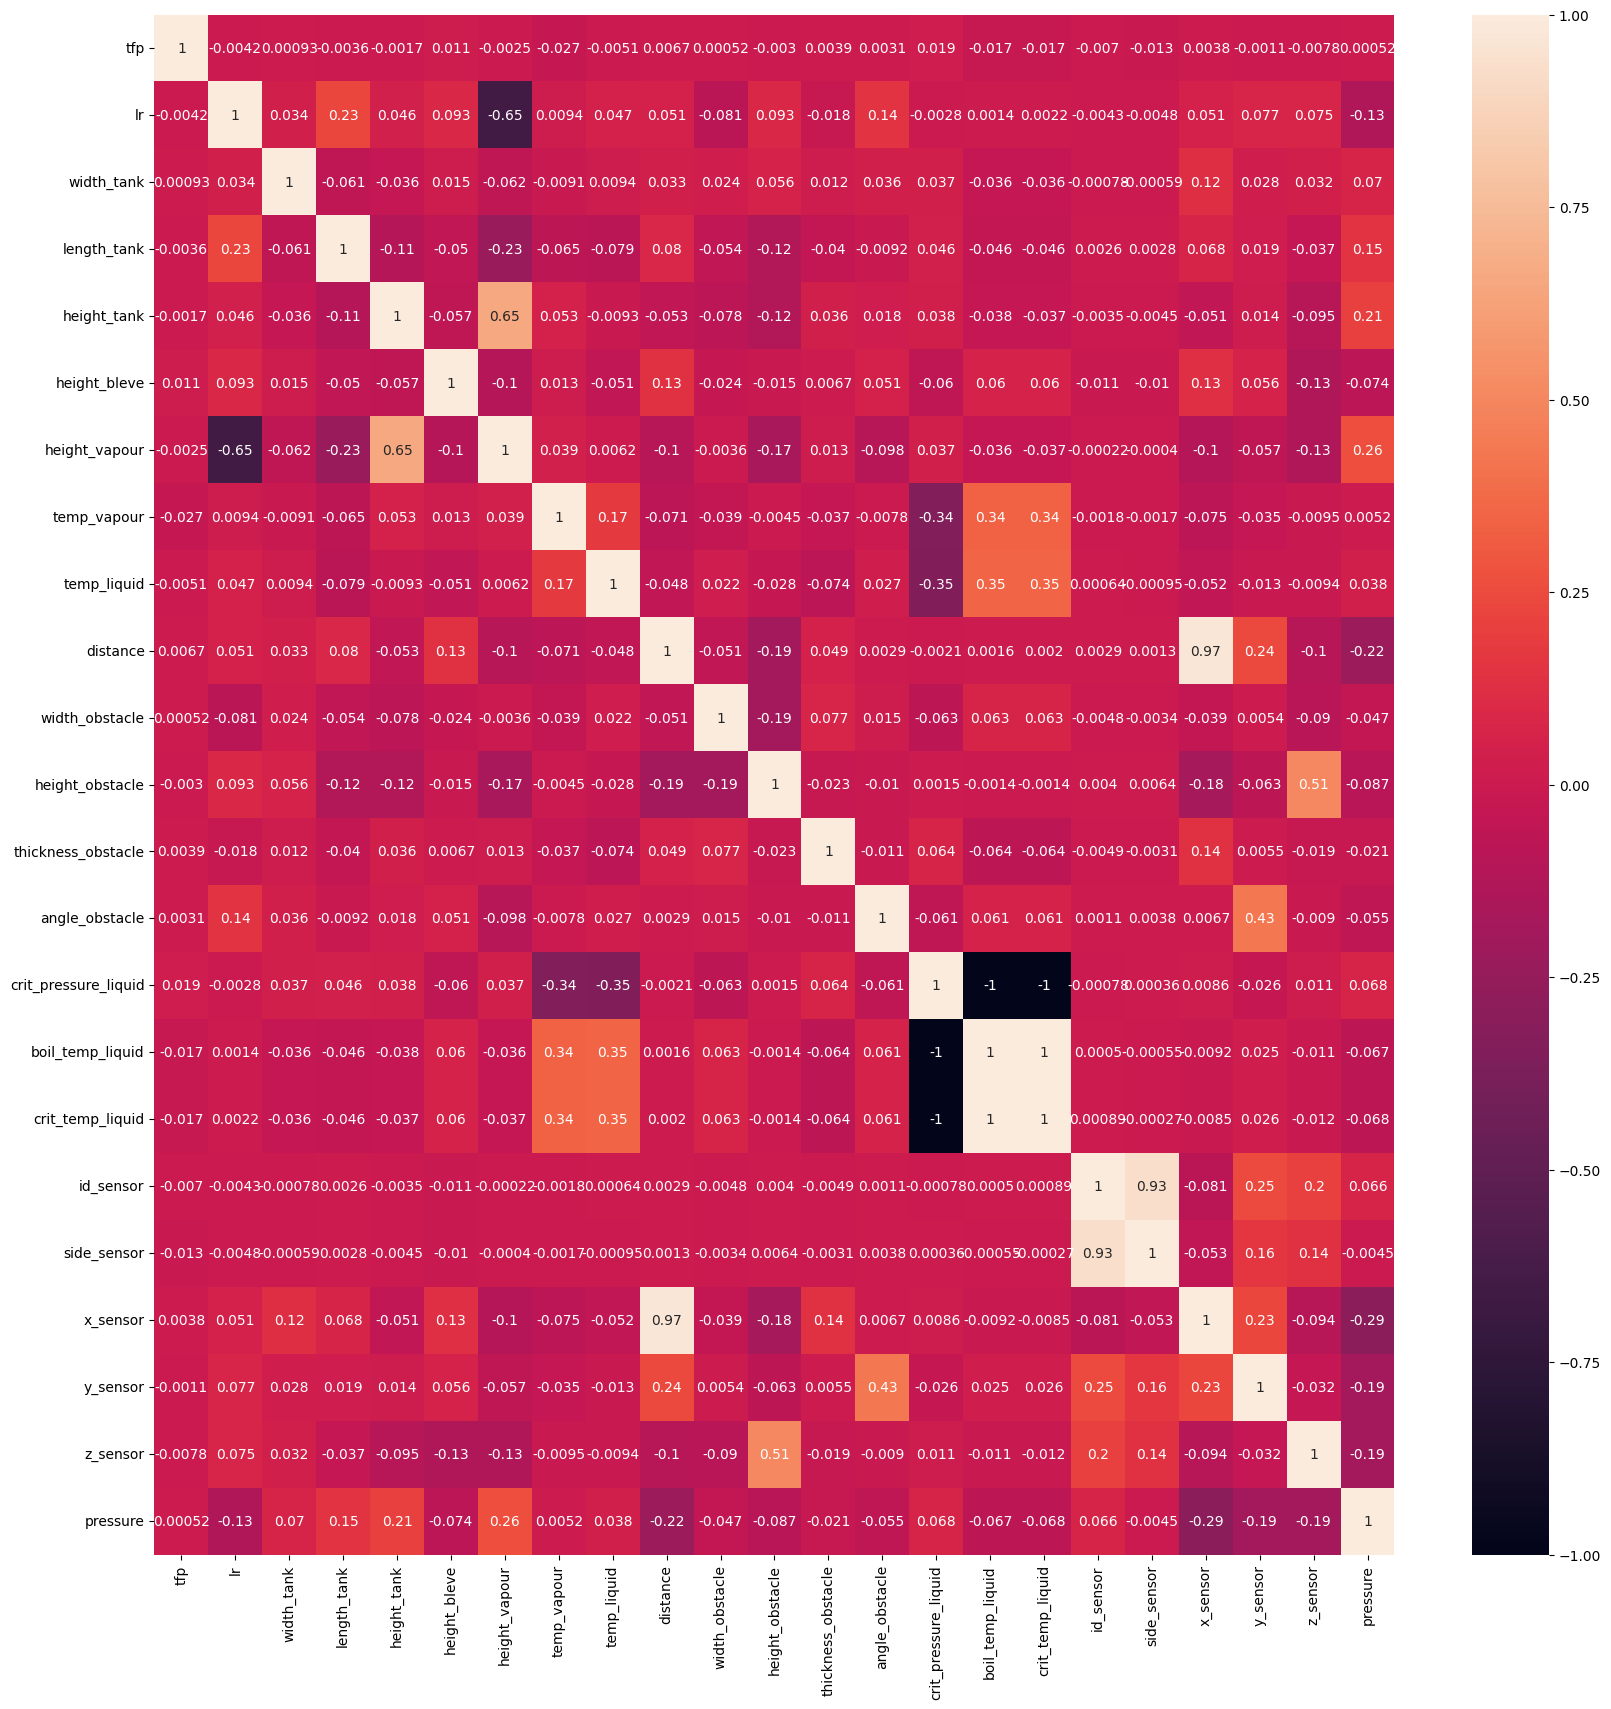

In [14]:
cor_mtx = train.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(cor_mtx, annot=True)

- crit_pressure_liquid, boil_temp_liquid, crit_temp_liquid - weird variables. perfectly correlated?? should definitely remove 2/3 of these
- x_sensor, distance and id_sensor,side_sensor HEAVILY correlated. we will analyse both to see areas of improvement

### Sensor ID, side_sensor

In [15]:
train['id_sensor'].nunique()

27

In [16]:
# Checking side_sensor value and count for each id_sensor
train.groupby('id_sensor')['side_sensor'].value_counts().unstack(fill_value=0)


side_sensor,1.0000,2.0000,3.0000,4.0000,5.0000
id_sensor,,,,,
1.0000,305,0,0,0,0
2.0000,304,0,0,0,0
3.0000,295,0,0,0,0
4.0000,304,0,0,0,0
5.0000,301,0,0,0,0
6.0000,298,0,0,0,0
7.0000,299,0,0,0,0
8.0000,302,0,0,0,0
9.0000,305,0,0,0,0


- Side 1: 1-9
- Side 2: 10-18
- Side 3: 19-21
- Side 4: 22-24
- Side 5: 25-27
<br>

- Side 1-2 is front/back
- Side 3-5 is top/left/right
<br>

- id_sensor definitely needs to be removed because side_sensor already has it's information
- side_sensor needs to be changed from label encoding to one hot encoding. this is because with label encoding, an artificial numeric order is being imposed when no such order exists

### distance, sensor coordinates

<Axes: xlabel='x_sensor', ylabel='distance'>

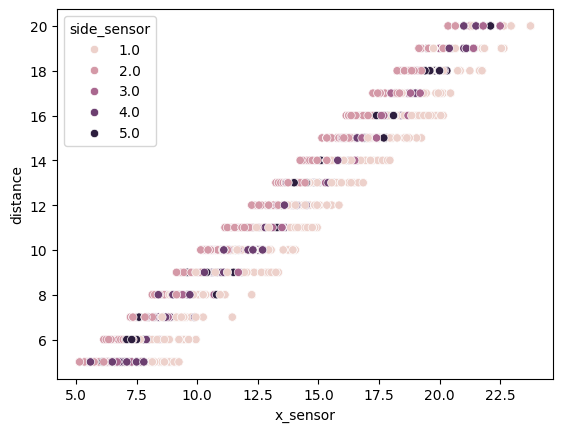

In [17]:
sns.scatterplot(data=train, x="x_sensor", y="distance", hue="side_sensor")


In [18]:
train[['distance','x_sensor',
       'y_sensor','z_sensor']].sort_values('x_sensor').head(10)

,distance,x_sensor,y_sensor,z_sensor
6015,5.0000,5.1500,-1.6000,4.0000
6014,5.0000,5.1500,-1.6000,1.7000
6475,5.0000,5.1500,0.0000,-1.1000
6480,5.0000,5.1500,2.3000,14.5000
6013,5.0000,5.1500,-1.6000,-0.6000
6020,5.0000,5.1500,6.0000,1.7000
6472,5.0000,5.1500,-2.3000,-1.1000
6476,5.0000,5.1500,0.0000,6.7000
6018,5.0000,5.1500,2.2000,4.0000
6477,5.0000,5.1500,0.0000,14.5000


In [19]:
train[['distance','x_sensor','y_sensor','z_sensor']].sort_values('x_sensor', ascending=False).head(10)

,distance,x_sensor,y_sensor,z_sensor
4581,20.0000,23.7500,12.3000,0.9000
4574,20.0000,23.7500,9.7000,-0.4000
4576,20.0000,23.7500,11.0000,-1.7000
4573,20.0000,23.7500,9.7000,-1.7000
4580,20.0000,23.7500,12.3000,-0.4000
4578,20.0000,23.7500,11.0000,0.9000
6330,20.0000,22.9500,6.3000,2.4000
6328,20.0000,22.9500,6.3000,-1.2000
6336,20.0000,22.9500,14.9000,2.4000
6335,20.0000,22.9500,14.9000,0.6000


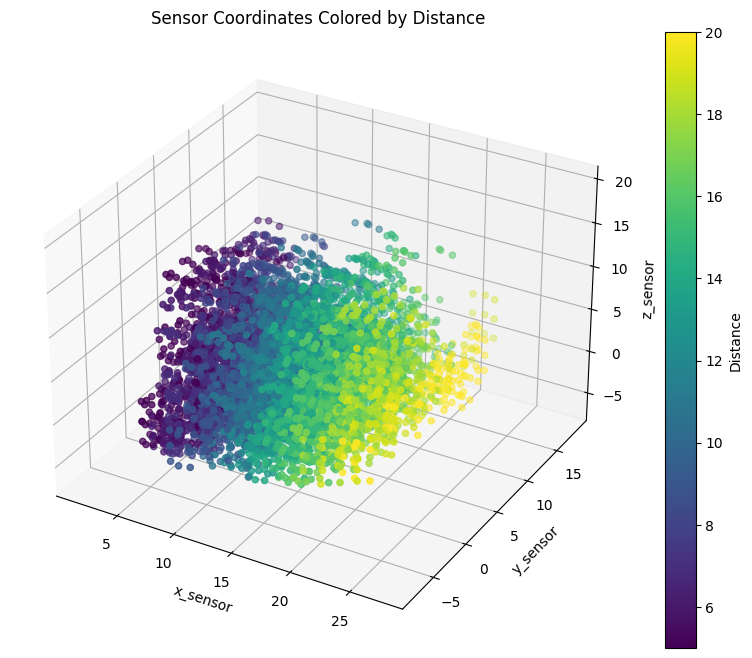

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    train['x_sensor'], train['y_sensor'], train['z_sensor'],
    c=train['distance'])
plt.colorbar(scatter, ax=ax, label='Distance')

ax.set_xlabel('x_sensor')
ax.set_ylabel('y_sensor')
ax.set_zlabel('z_sensor')
ax.set_title('Sensor Coordinates Colored by Distance')

# Equal axis scaling
max_range = np.array([
    train['x_sensor'].max() - train['x_sensor'].min(),
    train['y_sensor'].max() - train['y_sensor'].min(),
    train['z_sensor'].max() - train['z_sensor'].min()
]).max() / 2.0

mid_x = (train['x_sensor'].max() + train['x_sensor'].min()) * 0.5
mid_y = (train['y_sensor'].max() + train['y_sensor'].min()) * 0.5
mid_z = (train['z_sensor'].max() + train['z_sensor'].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()


In [21]:
train[['x_sensor', 'y_sensor', 'z_sensor']].mean().values

array([12.91928936,  2.93359054,  3.07867098])

- distance increases as x_sensor increases
- from the sorted dataframes of x_sensor, distance is just a truncated x_sensor
- **remove distance**

### height_vapour, height_tank, liquid ratio

In [22]:
train[['height_vapour','lr','height_tank']].head(10)

,height_vapour,lr,height_tank
8162,0.8100,0.7600,3.0100
6136,1.5900,0.2100,2.0200
4800,0.4000,0.6300,1.0100
1885,0.6200,0.2100,0.8100
7579,0.7900,0.7200,2.7800
6758,1.1800,0.1900,1.4000
1340,0.3800,0.5700,1.0000
6299,0.2200,0.9000,1.8100
4693,0.8100,0.7100,2.2000
694,1.0000,0.3500,1.5900


In [23]:
# Creating a new variable for to calculate height_vapour
train['test_height_vapour'] = (1 - train['lr']) * train['height_tank']

In [24]:
# Comparing new variable with measured height_vapour
train[['height_vapour','test_height_vapour']].head(10)

,height_vapour,test_height_vapour
8162,0.8100,0.7224
6136,1.5900,1.5958
4800,0.4000,0.3737
1885,0.6200,0.6399
7579,0.7900,0.7784
6758,1.1800,1.1340
1340,0.3800,0.4300
6299,0.2200,0.1810
4693,0.8100,0.6380
694,1.0000,1.0335


In [25]:
train['height_vapour'].corr(train['test_height_vapour'])

0.9905033489467249

In [26]:
train = train.drop(columns=['test_height_vapour'], axis=1)

- height_vapour = (1 - liquid ratio) * height_tank
- although the calculated calculated height_vapour is a little bit off from the recorded height_vapour (maybe due to human error calculation), it can be seen from the r coefficient that height_vapour can be derived from height_tank and liquid ratio

### Missing Values

In [27]:
train.isnull().sum()

tfp                      6
lr                       6
width_tank               5
length_tank              3
height_tank              5
height_bleve             6
height_vapour            6
temp_vapour             18
temp_liquid             22
distance                 5
width_obstacle           6
height_obstacle          4
thickness_obstacle       4
angle_obstacle           4
status                   5
crit_pressure_liquid    20
boil_temp_liquid        15
crit_temp_liquid        19
id_sensor                4
side_sensor              6
x_sensor                 5
y_sensor                 5
z_sensor                 4
pressure                 4
dtype: int64

In [28]:
train.isnull().sum().sum()

187

In [29]:
train[train['tfp'].isnull() == True]

,tfp,lr,width_tank,length_tank,height_tank,height_bleve,height_vapour,temp_vapour,temp_liquid,distance,width_obstacle,height_obstacle,thickness_obstacle,angle_obstacle,status,crit_pressure_liquid,boil_temp_liquid,crit_temp_liquid,id_sensor,side_sensor,x_sensor,y_sensor,z_sensor,pressure
6634,NaN,NaN,NaN,2.5900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0000,NaN,NaN,-42.0000,NaN,10.0000,NaN,20.1500,NaN,NaN,NaN
4969,NaN,NaN,NaN,2.5800,NaN,NaN,NaN,507.8300,NaN,15.0000,NaN,NaN,NaN,NaN,NaN,NaN,-1.0000,NaN,NaN,NaN,NaN,NaN,-0.7000,NaN
7961,NaN,NaN,NaN,6.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0000,NaN,NaN,NaN,37.9000,-1.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.9140
8376,NaN,NaN,1.3900,NaN,1.9900,NaN,NaN,NaN,285.3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0000,NaN,NaN,NaN,NaN,NaN,NaN
5866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,1.9900,11.0000,NaN,NaN,NaN,NaN,25.0000,NaN,NaN,NaN,NaN,0.1137
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7900,NaN,Superheated,NaN,NaN,NaN,NaN,NaN,NaN,-2.1000,4.9000,NaN


In [30]:
train.loc[(train['crit_temp_liquid'].isnull() == True), ['temp_vapour', 'temp_liquid', 'crit_pressure_liquid', 
                                                         'boil_temp_liquid', 'crit_temp_liquid']]

,temp_vapour,temp_liquid,crit_pressure_liquid,boil_temp_liquid,crit_temp_liquid
6634,NaN,NaN,NaN,-42.0000,NaN
8892,329.0200,347.3200,37.9000,-1.0000,NaN
4969,507.8300,NaN,NaN,-1.0000,NaN
7113,552.4500,378.2000,37.9000,-1.0000,NaN
8604,357.4700,387.3800,37.9000,-1.0000,NaN
3880,521.0800,320.2500,37.9000,-1.0000,NaN
7961,NaN,NaN,37.9000,-1.0000,NaN
1055,363.0400,407.1600,37.9000,-1.0000,NaN
5520,301.4600,299.0100,37.9000,-1.0000,NaN
5866,NaN,NaN,NaN,NaN,NaN


In [31]:
train.dropna(subset=['temp_vapour', 'temp_liquid', 'crit_pressure_liquid', 
                     'boil_temp_liquid', 'crit_temp_liquid']).shape

(7963, 24)

**Notes**
\
tfp, lr, width_tank, length_tank, height_tank, height_bleve, height_vapour, distance, width_obstacle, height_obstacle, thickness_obstacle, angle_obstacle, status, id_sensor, side_sensor, x_sensor, y_sensor, z_sensor, pressure
- these features are all missing values consistent across 6 observations
- omit these observations as they account for < 0.1% of the data

temp_vapour, temp_liquid, crit_pressure_liquid, boil_temp_liquid, crit_temp_liquid
- missing values seem to be more spread out across the data
- removing all rows with missing values seem to only count for 1% of the data. these observations should be omitted

i am simply removing the missing data from the training set BUT there could be missing data from the validation/test sets. removing test set data alters the indexing and expected layout of the predictions. **design mean/median/mode imputer or KNN imputer**

### Outliers

<Axes: ylabel='height_vapour'>

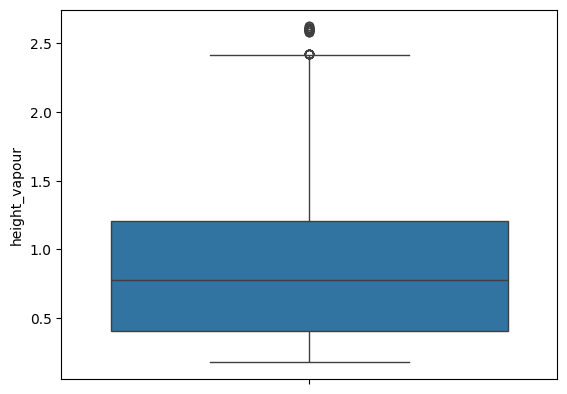

In [32]:
sns.boxplot(data=train['height_vapour'])

In [33]:
len(train[train['height_vapour']>2.5])

22

**Notes**
- **tfp**: 43 outliers when tfp>1000
- **height_vapour**: 22 outliers when tfp>2.5, also data seems slightly right skewed
- **crit_pressure_liquid, boil_temp_liquid, crit_temp_liquid**: they have no lower and upper whisker (only IQR?)
- **pressure**: heavily skewed, may need a transformation, recheck outliers after distribution is changed

### Distributions

In [34]:
train.columns

Index(['tfp', 'lr', 'width_tank', 'length_tank', 'height_tank', 'height_bleve',
       'height_vapour', 'temp_vapour', 'temp_liquid', 'distance',
       'width_obstacle', 'height_obstacle', 'thickness_obstacle',
       'angle_obstacle', 'status', 'crit_pressure_liquid', 'boil_temp_liquid',
       'crit_temp_liquid', 'id_sensor', 'side_sensor', 'x_sensor', 'y_sensor',
       'z_sensor', 'pressure'],
      dtype='object')

<Axes: xlabel='pressure', ylabel='Count'>

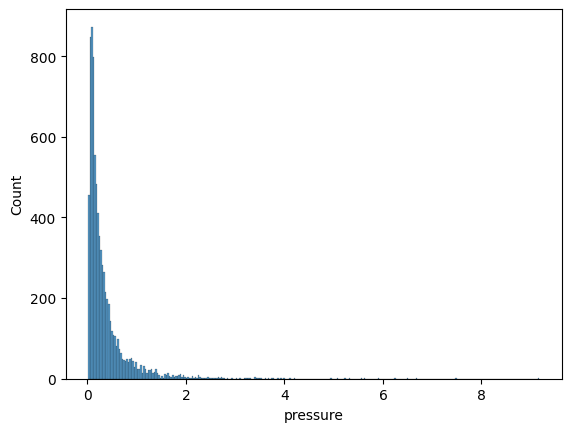

In [35]:
sns.histplot(train['pressure'])

**Notes**
- 'height_vapour': slight left skew, not too bad though tbh
- 'crit_pressure_liquid', 'boil_temp_liquid', 'crit_temp_liquid': only has 2 values? maybe turn into categorical 
- 'pressure': strong right skew

In [36]:
print(train['crit_pressure_liquid'].value_counts(),
      train['boil_temp_liquid'].value_counts(),
      train['crit_temp_liquid'].value_counts())

crit_pressure_liquid
37.9000    4330
42.5000    3690
Name: count, dtype: int64 boil_temp_liquid
-1.0000     4331
-42.0000    3694
Name: count, dtype: int64 crit_temp_liquid
152.0000    4326
96.7000     3695
Name: count, dtype: int64


### Incorrect Entries

In [37]:
train['status'].value_counts()

status
Subcooled      4946
Superheated    3024
subcooled        16
Subcool          15
Subcoled         13
Saperheated       8
superheated       7
Superheat         6
Name: count, dtype: int64

In [38]:
for col in train.columns:
    unique_types = train[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"{col} has multiple types: {unique_types}")

status has multiple types: [<class 'str'> <class 'float'>]


- status has a bunch of incorrect entries
- all the other features seem to have 1 type for every entry

### Duplicates

In [39]:
len(train[train.duplicated])

32

- remove these

# Data Cleaning

### Redundant Features

In [40]:
to_drop = ['id_sensor','distance','height_vapour',
           'crit_temp_liquid','crit_pressure_liquid','boil_temp_liquid']

train = train.drop(columns=to_drop, axis=1)
test = test.drop(columns=to_drop, axis=1)

### Missing Data

In [41]:
train = train.dropna(subset=['tfp', 'temp_vapour', 'temp_liquid'])

- update: missing observations with crit_pressure_liquid, boil_temp_liquid, crit_temp_liquid will not be removed as these variables will be removed altogether

In [42]:
train.shape

(8004, 18)

In [43]:
# Define the columns to exclude from imputation
exclude_cols = ['status', 'side_sensor']

# Determine the columns to impute by excluding the specified columns
impute_cols = [col for col in train.columns if col not in exclude_cols]

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data subset
imputer.fit(train[impute_cols])

# Update the train and test DataFrames in place for the imputed columns
train.loc[:, impute_cols] = imputer.transform(train[impute_cols])
test.loc[:, impute_cols] = imputer.transform(test[impute_cols])

### Outlier

In [44]:
train = train[train['tfp'] < 1000]
# train = train[train['height_vapour'] < 2.5]

### Duplicates

In [45]:
train = train.drop_duplicates()

In [46]:
train.shape

(7930, 18)

### Incorrect Entries
I will implement fuzzy matching instead of hardcoding a 'synonym map' because there could more variations of incorrectly spelt categories on the test set that are not present in the training set.

In [47]:
train['status'] = train['status'].str.lower().fillna('subcooled')
test['status'] = test['status'].str.lower().fillna('subcooled')

In [48]:
def map_category(entry, threshold=80):
    valid_categories = ["subcooled", "superheated"]
    best_match, score, _ = process.extractOne(entry, valid_categories, scorer=fuzz.ratio)
    if score >= threshold:
        return best_match
    else:
        # assign most common category for unknown values
        return "subcooled"

In [49]:
# testing on the value counts outputs
incorrect_entries = ["subcooled", "superheated", "subcool", "subcoled", "saperheated", "superheat"]
for entry in incorrect_entries:
    print(f"{entry} -> {map_category(entry)}")

subcooled -> subcooled
superheated -> superheated
subcool -> subcooled
subcoled -> subcooled
saperheated -> superheated
superheat -> superheated


In [50]:
train['status'] = train['status'].apply(map_category)
train['status'].value_counts()

status
subcooled      4937
superheated    2993
Name: count, dtype: int64

In [51]:
test['status'] = test['status'].apply(map_category)

# Feature Engineering

### Feature Scaling

In [52]:
# Dropping non-numeric columns for this example as we are finding correlations with the target 
# (need numerical variables)
train_numeric = train.select_dtypes(include=[np.number])

In [53]:
features = [col for col in train_numeric.columns if col != 'pressure']

# ----------------------------------------------------------
# Transform target
# ----------------------------------------------------------
sqrt_target = np.sqrt(train_numeric['pressure'])
log_target = np.log(train_numeric['pressure']+0.001)  # requires > 0, else add an offset

# Box-Cox 
boxcox_vals, _ = boxcox(train_numeric['pressure'])
boxcox_target = pd.Series(boxcox_vals, index=train_numeric.index)


# ----------------------------------------------------------
# Compute correlations for each transformation
# ----------------------------------------------------------
transformations = {
    'original': train_numeric['pressure'],
    'sqrt':     sqrt_target,
    'log':      log_target,
    'boxcox':   boxcox_target
}

rows = []
for f in features:
    row = {'feature': f}
    for name, transformed_target in transformations.items():
        row[name] = transformed_target.corr(train_numeric[f])
    rows.append(row)

df_results = pd.DataFrame(rows)


df_results

,feature,original,sqrt,log,boxcox
0,tfp,0.0862,0.1069,0.1186,0.1202
1,lr,-0.1330,-0.1463,-0.1431,-0.1407
2,width_tank,0.0701,0.0883,0.1030,0.1058
3,length_tank,0.1473,0.1663,0.1657,0.1635
4,height_tank,0.2082,0.2321,0.2308,0.2280
5,height_bleve,-0.0735,-0.1008,-0.1142,-0.1151
6,temp_vapour,0.0047,0.0089,0.0130,0.0137
7,temp_liquid,0.0376,0.0479,0.0551,0.0560
8,width_obstacle,-0.0463,-0.0789,-0.1107,-0.1170
9,height_obstacle,-0.0880,-0.1116,-0.1246,-0.1261


<Axes: xlabel='pressure', ylabel='Count'>

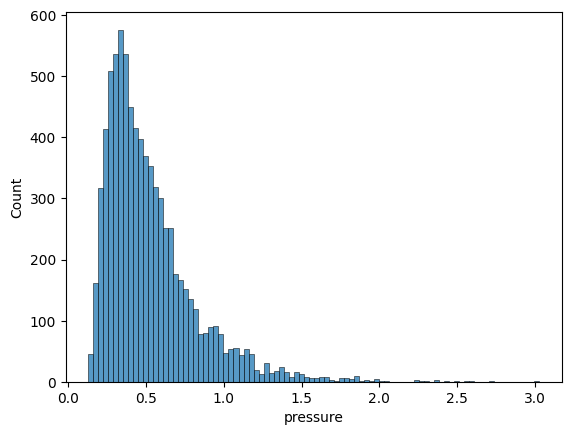

In [54]:
sns.histplot(sqrt_target)

<Axes: xlabel='pressure', ylabel='Count'>

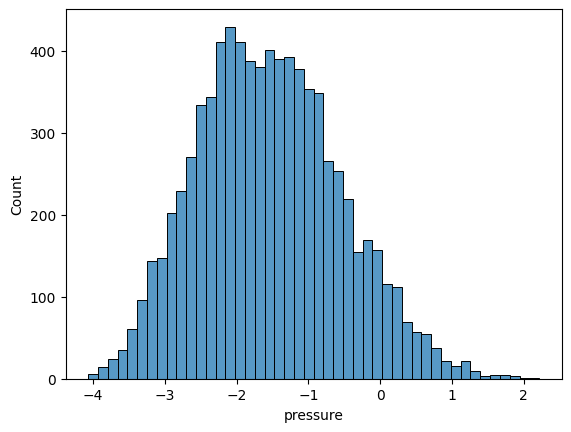

In [55]:
sns.histplot(log_target)

<Axes: ylabel='Count'>

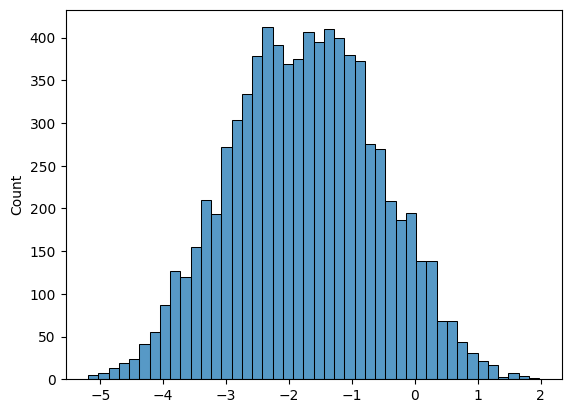

In [56]:
sns.histplot(boxcox_target)

Exploring the improvement of linear relationships between the features and different transformations of the target variable
- There seems to be very consistent small improvement across all features for each transformation
- Correlation coefficients are small
- We will use a log transformation as it does just as good as boxcox in terms of increasing correlation of features with the target, however, it's also easier to inverse after predictions

In [57]:
train['pressure'] = np.log(train['pressure']+0.001)
test['pressure'] = np.log(test['pressure']+0.001)

# Standardisation

In [58]:
std_cols = train.drop(columns=['status','side_sensor','pressure'], axis=1).columns

scaler = StandardScaler()
scaler.fit(train[std_cols])
train.loc[:, std_cols] = scaler.transform(train[std_cols])
test.loc[:, std_cols]  = scaler.transform(test[std_cols])

In [59]:
train.describe()

,tfp,lr,width_tank,length_tank,height_tank,height_bleve,temp_vapour,temp_liquid,width_obstacle,height_obstacle,thickness_obstacle,angle_obstacle,side_sensor,x_sensor,y_sensor,z_sensor,pressure
count,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000,7930.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,2.3284,0.0000,-0.0000,0.0000,-1.5437
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.3392,1.0001,1.0001,1.0001,0.9935
min,-1.6427,-1.7382,-1.7590,-1.8966,-1.7364,-1.8370,-1.6318,-1.6767,-1.4273,-1.3736,-1.7512,-1.5201,1.0000,-1.8588,-2.5828,-1.4049,-4.0688
25%,-0.8711,-0.9454,-0.9347,-0.8288,-0.8725,-0.7694,-0.7953,-0.8495,-0.9218,-0.8448,-0.9206,-0.8718,1.0000,-0.8780,-0.6515,-0.8651,-2.2675
50%,-0.1118,0.0677,0.0858,0.0101,-0.0634,-0.0169,-0.1360,-0.0302,0.0893,-0.0516,-0.0900,-0.0073,2.0000,-0.0646,-0.0509,-0.1845,-1.5939
75%,0.9718,0.8164,0.8840,0.8644,0.7731,0.9807,0.6428,0.6638,0.8476,0.7416,0.9416,0.7490,3.0000,0.7966,0.7033,0.5431,-0.8827
max,1.8722,1.7854,1.6952,1.7034,1.8839,1.7333,2.4414,2.2274,2.3642,2.5925,1.7856,1.7216,5.0000,2.5907,3.5800,3.0309,2.2161


# One-Hot Encoding

In [60]:
train['status'] = train['status'].map({'subcooled': 0, 'superheated': 1})
test['status'] = test['status'].map({'subcooled': 0, 'superheated': 1})

train['status'].value_counts()

status
0    4937
1    2993
Name: count, dtype: int64

In [61]:
# Mapping from numeric codes to categorical labels
mapping = {1: 'back', 2: 'front', 3: 'left', 4: 'top', 5: 'right'}

train['side_sensor'] = train['side_sensor'].map(mapping)
train = pd.get_dummies(train, columns=['side_sensor'], prefix='side', dtype=int)

test['side_sensor'] = test['side_sensor'].map(mapping)
test = pd.get_dummies(test, columns=['side_sensor'], prefix='side', dtype=int)

In [62]:
train.head()

,tfp,lr,width_tank,length_tank,height_tank,height_bleve,temp_vapour,temp_liquid,width_obstacle,height_obstacle,thickness_obstacle,angle_obstacle,status,x_sensor,y_sensor,z_sensor,pressure,side_back,side_front,side_left,side_right,side_top
8162,1.0047,1.1688,0.6223,1.0131,1.8702,-0.4369,-1.2727,0.3926,0.0893,-1.1092,0.9684,1.2893,1,-0.1484,1.3821,-0.5366,-1.2880,0,0,0,1,0
6136,0.6232,-1.2537,0.1120,0.0216,0.5126,-1.4170,1.7597,0.5552,1.1003,-0.8448,-1.7244,-0.4396,0,0.5215,1.2959,-0.9121,-1.3122,0,0,0,1,0
4800,-1.2499,0.5962,0.6484,1.6233,-0.8725,0.2807,-0.4075,-0.2682,0.3420,-0.8448,1.2229,1.2893,0,0.7487,-0.0724,0.0737,-1.2952,0,1,0,0,0
1885,-0.1099,-1.2537,0.1120,-0.9051,-1.1468,0.6482,1.3590,0.3014,-1.4273,0.2128,0.1378,-1.3040,0,-1.2129,-0.5896,-1.0764,-0.0170,0,1,0,0,0
7579,1.5677,0.9926,0.3606,-0.5886,1.5548,0.6657,0.6668,0.3860,-1.1746,-1.3736,1.2229,0.9652,0,1.4425,0.6171,-1.0998,-0.9345,0,1,0,0,0


<Axes: >

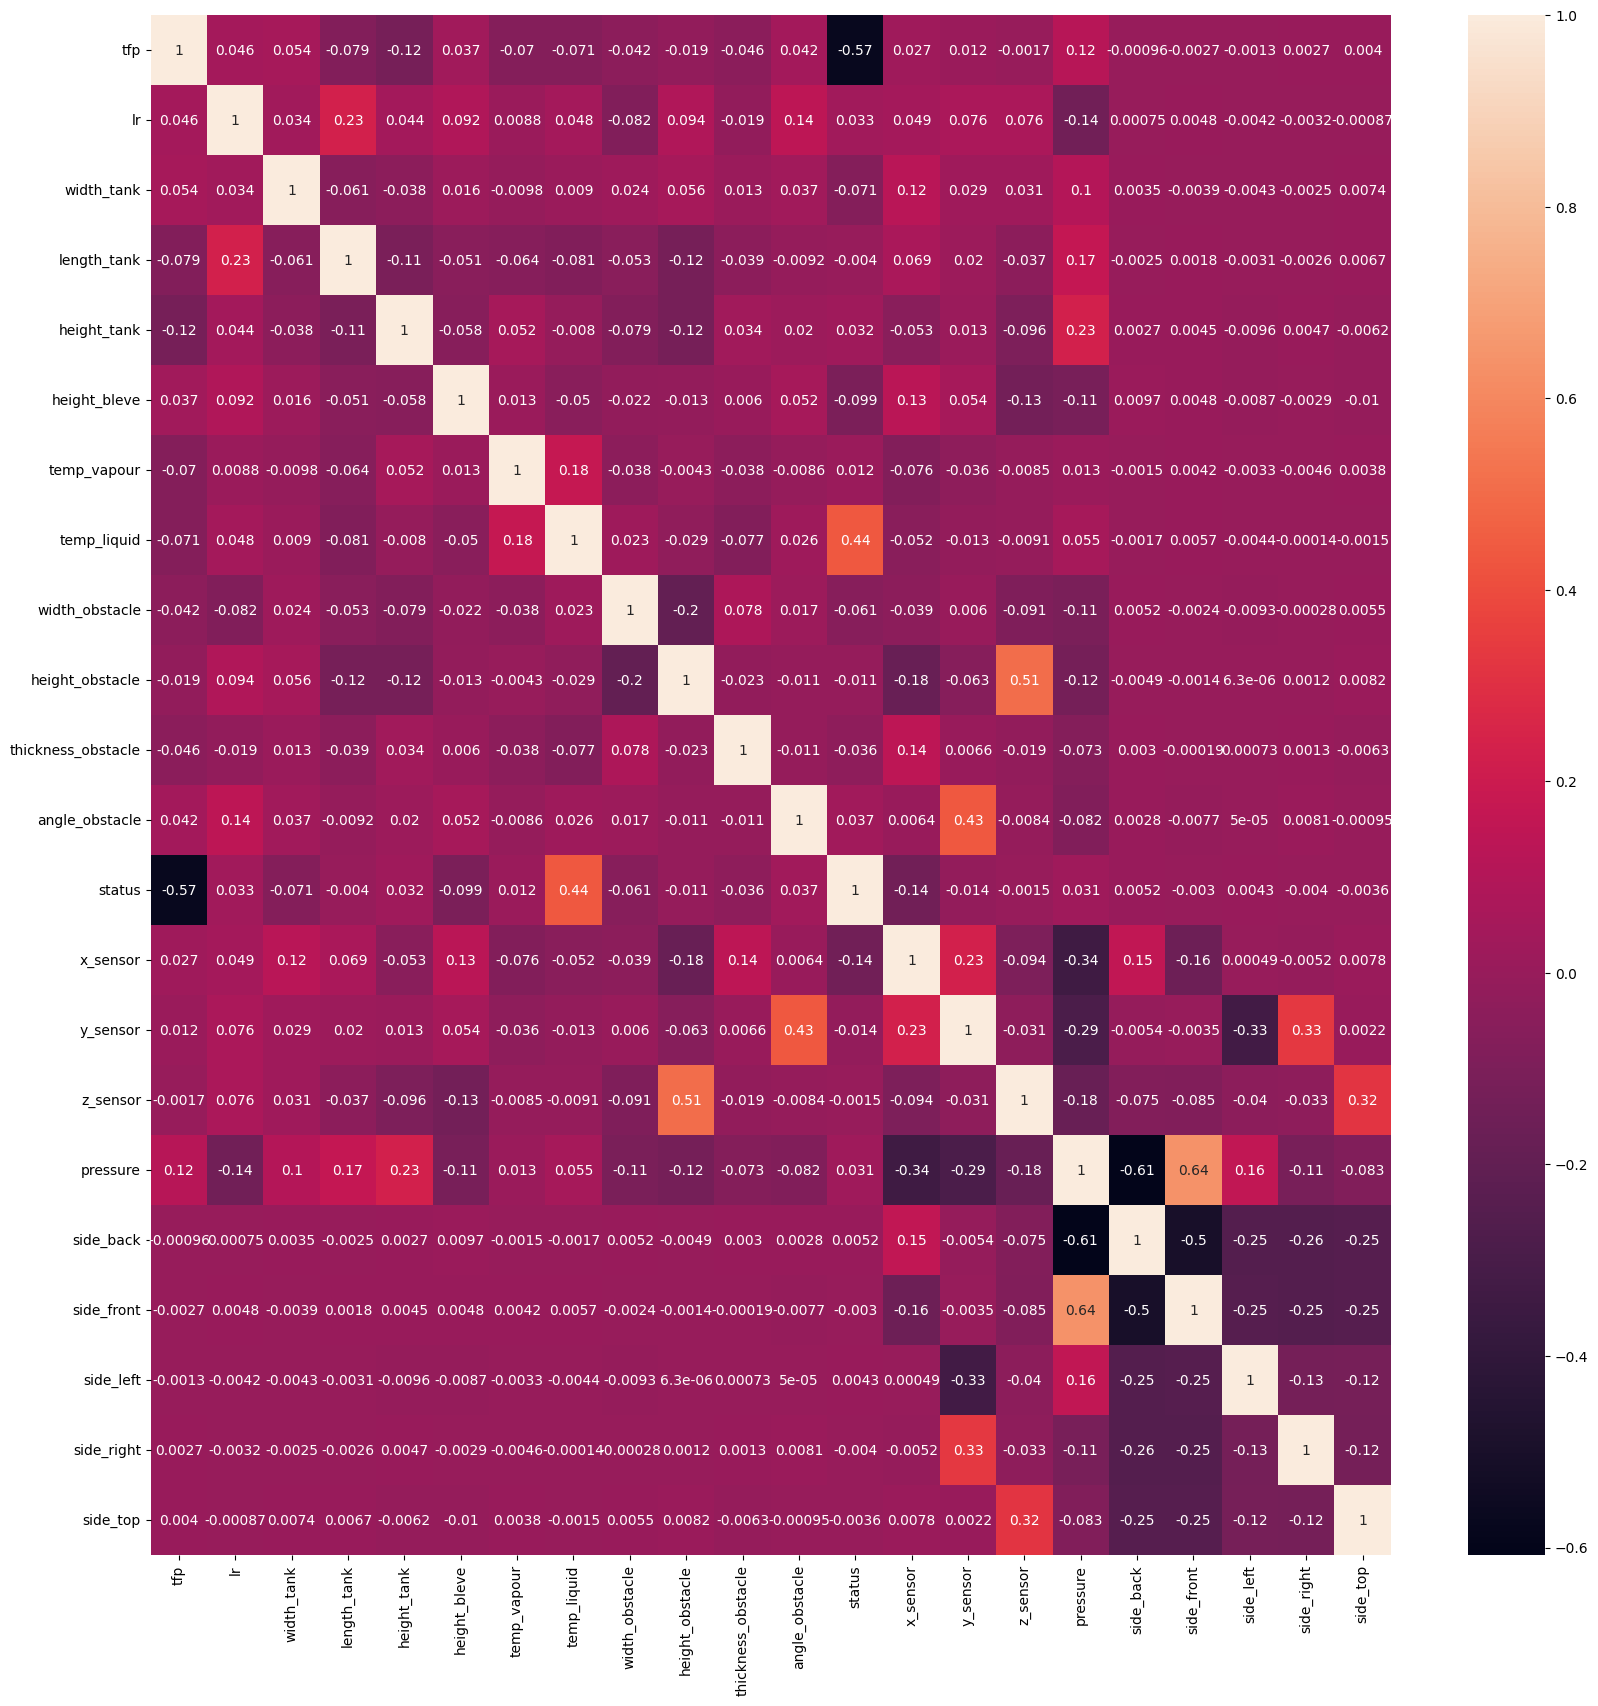

In [63]:
cor_mtx = train.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(cor_mtx, annot=True)

# Baseline Model

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


def custom_cv(model):
    X = train.drop('pressure', axis=1)
    y_log = train['pressure'] 

    kf = KFold(n_splits=5, shuffle=True, random_state=123)

    mse_scores, rmse_scores, mape_scores = [], [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train_log, y_test_log = y_log.iloc[train_index], y_log.iloc[test_index]

        model.fit(X_train, y_train_log)
        y_pred_log = model.predict(X_test)

        # Inverse transformation to original scale
        y_test = np.exp(y_test_log)
        y_pred = np.exp(y_pred_log)

        # Compute scores for this fold
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100

        # Store scores
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mape_scores.append(mape)

    # Scores per fold clearly
    for i, (mse, rmse, mape) in enumerate(zip(mse_scores, rmse_scores, mape_scores), 1):
        print(f"Fold {i}: MSE = {mse:.4f}, RMSE = {rmse:.4f}, MAPE = {mape:.4f}%")

    # Fold avg
    print("\nAverage Scores:")
    print(f"Avg MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Avg RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"Avg MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.4f}%")


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
custom_cv(lr)

Fold 1: MSE = 0.1059, RMSE = 0.3254, MAPE = 29.4157%
Fold 2: MSE = 0.0553, RMSE = 0.2352, MAPE = 28.1575%
Fold 3: MSE = 0.0802, RMSE = 0.2833, MAPE = 28.5902%
Fold 4: MSE = 0.0884, RMSE = 0.2973, MAPE = 28.3823%
Fold 5: MSE = 0.0981, RMSE = 0.3131, MAPE = 29.4253%

Average Scores:
Avg MSE: 0.0856 ± 0.0174
Avg RMSE: 0.2909 ± 0.0313
Avg MAPE: 28.79% ± 0.5294%


In [66]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=123)
custom_cv(xgb)

Fold 1: MSE = 0.0196, RMSE = 0.1401, MAPE = 15.5446%
Fold 2: MSE = 0.0145, RMSE = 0.1204, MAPE = 15.3198%
Fold 3: MSE = 0.0183, RMSE = 0.1352, MAPE = 15.8607%
Fold 4: MSE = 0.0370, RMSE = 0.1924, MAPE = 16.2521%
Fold 5: MSE = 0.0191, RMSE = 0.1381, MAPE = 15.8577%

Average Scores:
Avg MSE: 0.0217 ± 0.0079
Avg RMSE: 0.1452 ± 0.0246
Avg MAPE: 15.77% ± 0.3168%


In [67]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=1000, random_state=123)
custom_cv(mlp)

Fold 1: MSE = 0.0241, RMSE = 0.1551, MAPE = 13.9050%
Fold 2: MSE = 0.0126, RMSE = 0.1122, MAPE = 14.2329%
Fold 3: MSE = 0.0178, RMSE = 0.1334, MAPE = 13.6682%
Fold 4: MSE = 0.0288, RMSE = 0.1696, MAPE = 13.6950%
Fold 5: MSE = 0.0169, RMSE = 0.1301, MAPE = 13.7093%

Average Scores:
Avg MSE: 0.0200 ± 0.0057
Avg RMSE: 0.1401 ± 0.0201
Avg MAPE: 13.84% ± 0.2127%


# Comparing pipeline with preprocessed train

In [68]:
train2 = pickle.load(open('data/train.pkl', 'rb'))
test2 = pickle.load(open('data/test.pkl', 'rb'))
preprocess_pipeline = pickle.load(open('data/pipeline.pkl', 'rb'))

In [69]:
train2 = preprocess_pipeline.fit_transform(train2)
test2 = preprocess_pipeline.transform(test2)

In [70]:
train = train.reset_index(drop=True)
train2 = train2.reset_index(drop=True)

if train.equals(train2):
    print("DataFrames are identical.")
else:
    print("DataFrames differ.")

DataFrames are identical.


In [71]:
test = test.reset_index(drop=True)
test2 = test2.reset_index(drop=True)

if test.equals(test2):
    print("DataFrames are identical.")
else:
    print("DataFrames differ.")

DataFrames are identical.
